In [148]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

In [149]:
data = pd.read_csv('spambase.data').as_matrix()

C:\Users\Agniesia\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [150]:
np.random.shuffle(data)

In [151]:
#48 continuous real [0,100] attributes of type word_freq_WORD 
X = data[:,:57]
#1 nominal {0,1} class attribute of type spam
#| = denotes whether the e-mail was considered spam (1) or not (0), 
#| i.e. unsolicited commercial e-mail.  
Y = data[:,-1]

In [152]:
#datasplit for training and test
X_train = X[:-1380,]
Y_train = Y[:-1380,]
X_test = X[-1380:,]
Y_test = Y[-1380:,]


In [172]:
model = KNeighborsClassifier()
Y_pred = model.fit(X_train, Y_train).predict(X_test)

In [173]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score

In [174]:
f1_score(Y_test,Y_pred)

0.7164461247637051

In [175]:
roc_auc_score(Y_test, Y_pred)


0.7697124566622082

In [176]:
balanced_accuracy_score(Y_test, Y_pred)

0.7697124566622081

In [177]:
def matrix(Y_true, Y_pred): return confusion_matrix(Y_true, Y_pred)

In [178]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(Y_test, Y_pred)

In [179]:
average_precision

0.6234473142828021

Text(0.5,1,'2-class Precision-Recall curve: AP=0.62')

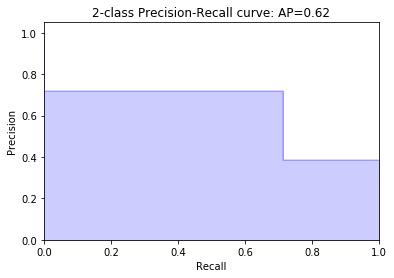

In [180]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature

precision, recall, _ = precision_recall_curve(Y_test, Y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

In [181]:
from sklearn.metrics import accuracy_score

In [182]:
accuracy_score(Y_test,Y_pred)

0.782608695652174

In [183]:
recall_score(Y_test,Y_pred)

0.7137476459510358